<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20raw%20now%20dng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [0]:
!pip install tensorflow==1.14.0

In [0]:
import os
os.chdir('/content/drive/My Drive/Raw_PCB')
os.getcwd()

'/content/drive/My Drive/Raw_PCB'

In [0]:
import numpy as np
a=np.load("s_x_train.npy")
b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)

(2669, 300, 300, 3)
(2669,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [0]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(1788, 300, 300, 3)
(1788,)
(881, 300, 300, 3)
(881,)
4
uint8
4
uint8
4
uint8


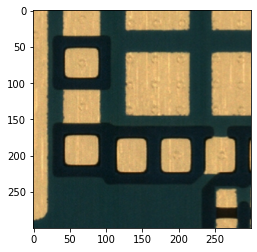

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [0]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788,)


In [0]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
1.0 1.0
0.0 0.0
51.16548
54.113026
3.766829 3.766829
-0.9455299 -0.9455299


In [0]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[0. 1.]


In [0]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [0]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import add
from keras.utils import plot_model
from keras import regularizers
import keras

input1 = keras.layers.Input(shape=(300,300,3))

x1 = Conv2D(300,(3,3),strides=(2,2) ,activation='relu',kernel_regularizer=regularizers.l2(0.01))(input1)
x2=keras.layers.BatchNormalization(axis = 3)(x1)
x3= Activation('relu')(x2)
x4= MaxPooling2D((3, 3), strides=(2, 2))(x3)

x5= Conv2D(400,(2,2),strides=(2,2) ,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x4)
x6=keras.layers.BatchNormalization(axis = 3)(x5)
x7= Activation('relu')(x6)
x8= MaxPooling2D((3, 3), strides=(2, 2))(x7)

x9= Conv2D(100,(2,2),strides=(1,1) ,activation='relu',kernel_regularizer=regularizers.l2(0.01))(x8)
x10=keras.layers.BatchNormalization(axis = 3)(x9)
x11= Activation('relu')(x10)
x12= AveragePooling2D((7, 7), strides=(1, 1))(x11)


o=keras.layers.Flatten()(x12)








out = keras.layers.Dense(2000,activation="relu",kernel_regularizer=regularizers.l2(0.01))(o)
out=keras.layers.Dropout(0.2,seed=1)(out)
out = keras.layers.Dense(1024,activation="relu",kernel_regularizer=regularizers.l2(0.01))(out)
out=keras.layers.Dropout(0.4,seed=1)(out)
out = keras.layers.Dense(100,activation="relu",kernel_regularizer=regularizers.l2(0.01))(out)
out1=keras.layers.Dense(2,activation="softmax")(out)

model = keras.models.Model(inputs=input1, outputs=out1)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 149, 149, 300)     8400      
_________________________________________________________________
batch_normalization_7 (Batch (None, 149, 149, 300)     1200      
_________________________________________________________________
activation_7 (Activation)    (None, 149, 149, 300)     0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 300)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 400)       480400    
_________________________________________________________________
batch_normalization_8 (Batch (None, 37, 37, 400)       1600

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [0]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [68]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain,batch_size=60,epochs=50,shuffle='true', verbose=1)

Epoch 1/50
1788/1788 [==============================] - 490s 274ms/step - loss: 54.5888 - acc: 0.9402
Epoch 2/50
1788/1788 [==============================] - 490s 274ms/step - loss: 53.9123 - acc: 0.9402
Epoch 3/50
1788/1788 [==============================] - 491s 275ms/step - loss: 53.2632 - acc: 0.9396
Epoch 4/50
1788/1788 [==============================] - 494s 276ms/step - loss: 52.6207 - acc: 0.9402
Epoch 5/50
1788/1788 [==============================] - 495s 277ms/step - loss: 51.9916 - acc: 0.9379
Epoch 6/50
1788/1788 [==============================] - 495s 277ms/step - loss: 51.3645 - acc: 0.9413
Epoch 7/50
1788/1788 [==============================] - 504s 282ms/step - loss: 50.7458 - acc: 0.9418
Epoch 8/50
1788/1788 [==============================] - 496s 277ms/step - loss: 50.1366 - acc: 0.9441
Epoch 9/50
1788/1788 [==============================] - 491s 275ms/step - loss: 49.5278 - acc: 0.9502
Epoch 10/50
1788/1788 [==============================] - 493s 276ms/step - loss: 4

KeyboardInterrupt: ignored

In [0]:
model.evaluate(xtest,ytest)

In [69]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.11      0.74      0.19        42
     class 1       0.98      0.70      0.81       839

    accuracy                           0.70       881
   macro avg       0.54      0.72      0.50       881
weighted avg       0.94      0.70      0.78       881



In [0]:
model.evaluate(xtrain,ytrain)

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))